# Credit Scoring with Missing Data Analysis

This notebook demonstrates the analysis of credit scoring data with a focus on handling Missing Not At Random (MNAR) data. We'll compare different methods for handling missing data and evaluate their impact on model performance.

## Table of Contents
1. [Setup and Data Loading](#1.-Setup-and-Data-Loading)
2. [Data Preprocessing](#2.-Data-Preprocessing)
3. [Missing Data Analysis](#3.-Missing-Data-Analysis)
4. [Handling Missing Data](#4.-Handling-Missing-Data)
5. [Model Training](#5.-Model-Training)
6. [Model Evaluation](#6.-Model-Evaluation)
7. [Results Comparison](#7.-Results-Comparison)
8. [Conclusions](#8.-Conclusions)

## 1. Setup and Data Loading

First, let's import the necessary libraries and load our data.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer
from sklearn.linear_model import LogisticRegression

# Add the 'src' directory to the Python path
import sys
import os
sys.path.append(os.path.abspath('../src'))

# Import our custom modules
from missing_data_handler import MissingDataHandler
from model import CreditScoringModel
from evaluation import ModelEvaluator
from utils import preprocess_data, plot_missingness, plot_feature_distributions, create_correlation_matrix, split_data

# Set random seed for reproducibility
np.random.seed(42)


# Load the three datasets with different missing data mechanisms
data_mar = pd.read_csv('../data_mar.csv')
data_mcar = pd.read_csv('../data_mcar.csv')
data_mnar = pd.read_csv('../data_mnar.csv')
print(f"MAR Dataset shape: {data_mar.shape}")
print(f"MCAR Dataset shape: {data_mcar.shape}")
print(f"MNAR Dataset shape: {data_mnar.shape}")



MAR Dataset shape: (1000, 11)
MCAR Dataset shape: (1000, 11)
MNAR Dataset shape: (1000, 11)


## 2. Data Preprocessing

Let's examine our data and perform initial preprocessing steps.

In [ ]:
# Display basic information about the MCAR dataset
print("Dataset Info for MCAR:")
data_mcar.info()

print("\nSummary Statistics for MCAR:")
data_mcar.describe()

# Display basic information about the MAR dataset
print("Dataset Info for MAR:")
data_mar.info()

print("\nSummary Statistics for MAR:")
data_mar.describe()

# Display basic information about the MNAR dataset
print("Dataset Info for MNAR:")
data_mnar.info()

print("\nSummary Statistics for MNAR:")
data_mnar.describe()

# # Display basic information about the MNAR dataset
# print("Dataset Info for MNAR Median Imputed:")
# data_mnar_median_imputed.info()

# print("\nSummary Statistics for MNAR Median Imputed:")
# data_mnar_median_imputed.describe()



Dataset Info for MNAR:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  target     789 non-null    float64
dtypes: float64(11)
memory usage: 86.1 KB

Summary Statistics for MNAR:
Dataset Info for MNAR Median Imputed:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1 

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.468296,1.567074,1.717891,1.572873,2.800319,1.562181,1.621417,1.502517,1.485106,2.040264,0.337000
std,1.129163,1.143300,1.250512,1.123346,2.133793,1.219414,1.184727,1.155885,1.138858,1.460754,0.472921
min,0.000896,0.000152,0.003444,0.002226,0.006055,0.000658,0.000116,0.000066,0.000441,0.002997,0.000000
25%,0.583530,0.648535,0.684025,0.648935,1.098777,0.632898,0.723596,0.584808,0.617340,0.902458,0.000000
50%,1.190879,1.380120,1.491317,1.369987,2.361372,1.284160,1.401474,1.255878,1.227303,1.754262,0.000000
75%,2.145394,2.257988,2.555105,2.255166,4.048184,2.249853,2.305453,2.154786,2.147240,2.884499,1.000000
max,5.824009,7.011590,7.409478,5.517741,11.818684,7.173891,8.712973,6.092681,7.544301,7.596189,1.000000


In [5]:
# # Preprocess the data
# processed_df = preprocess_data(df_rejected_gz)
# print(f"Processed dataset shape: {processed_df.shape}")

## 3. Missing Data Analysis

Let's analyze the patterns of missing data in our dataset.

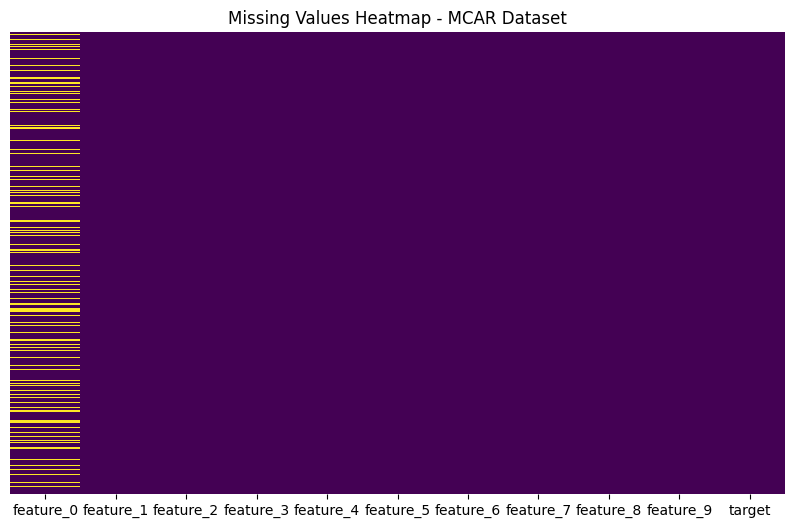

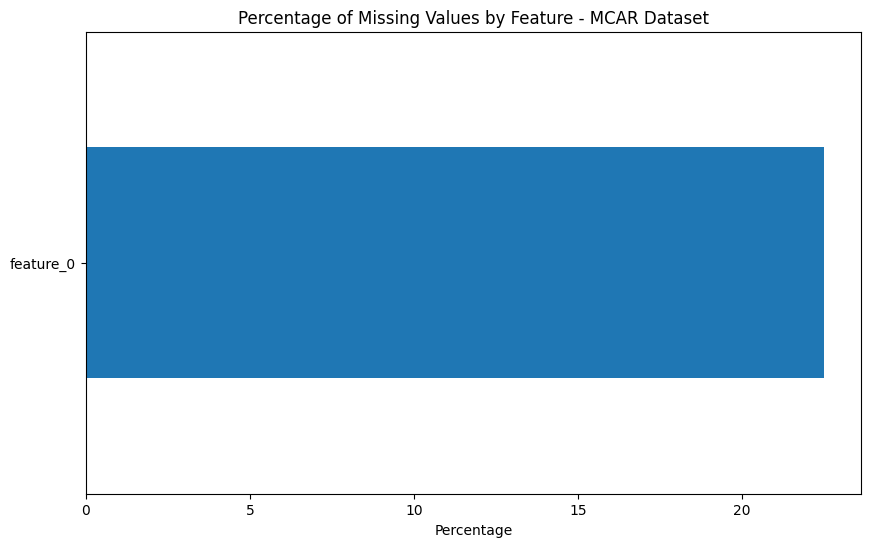

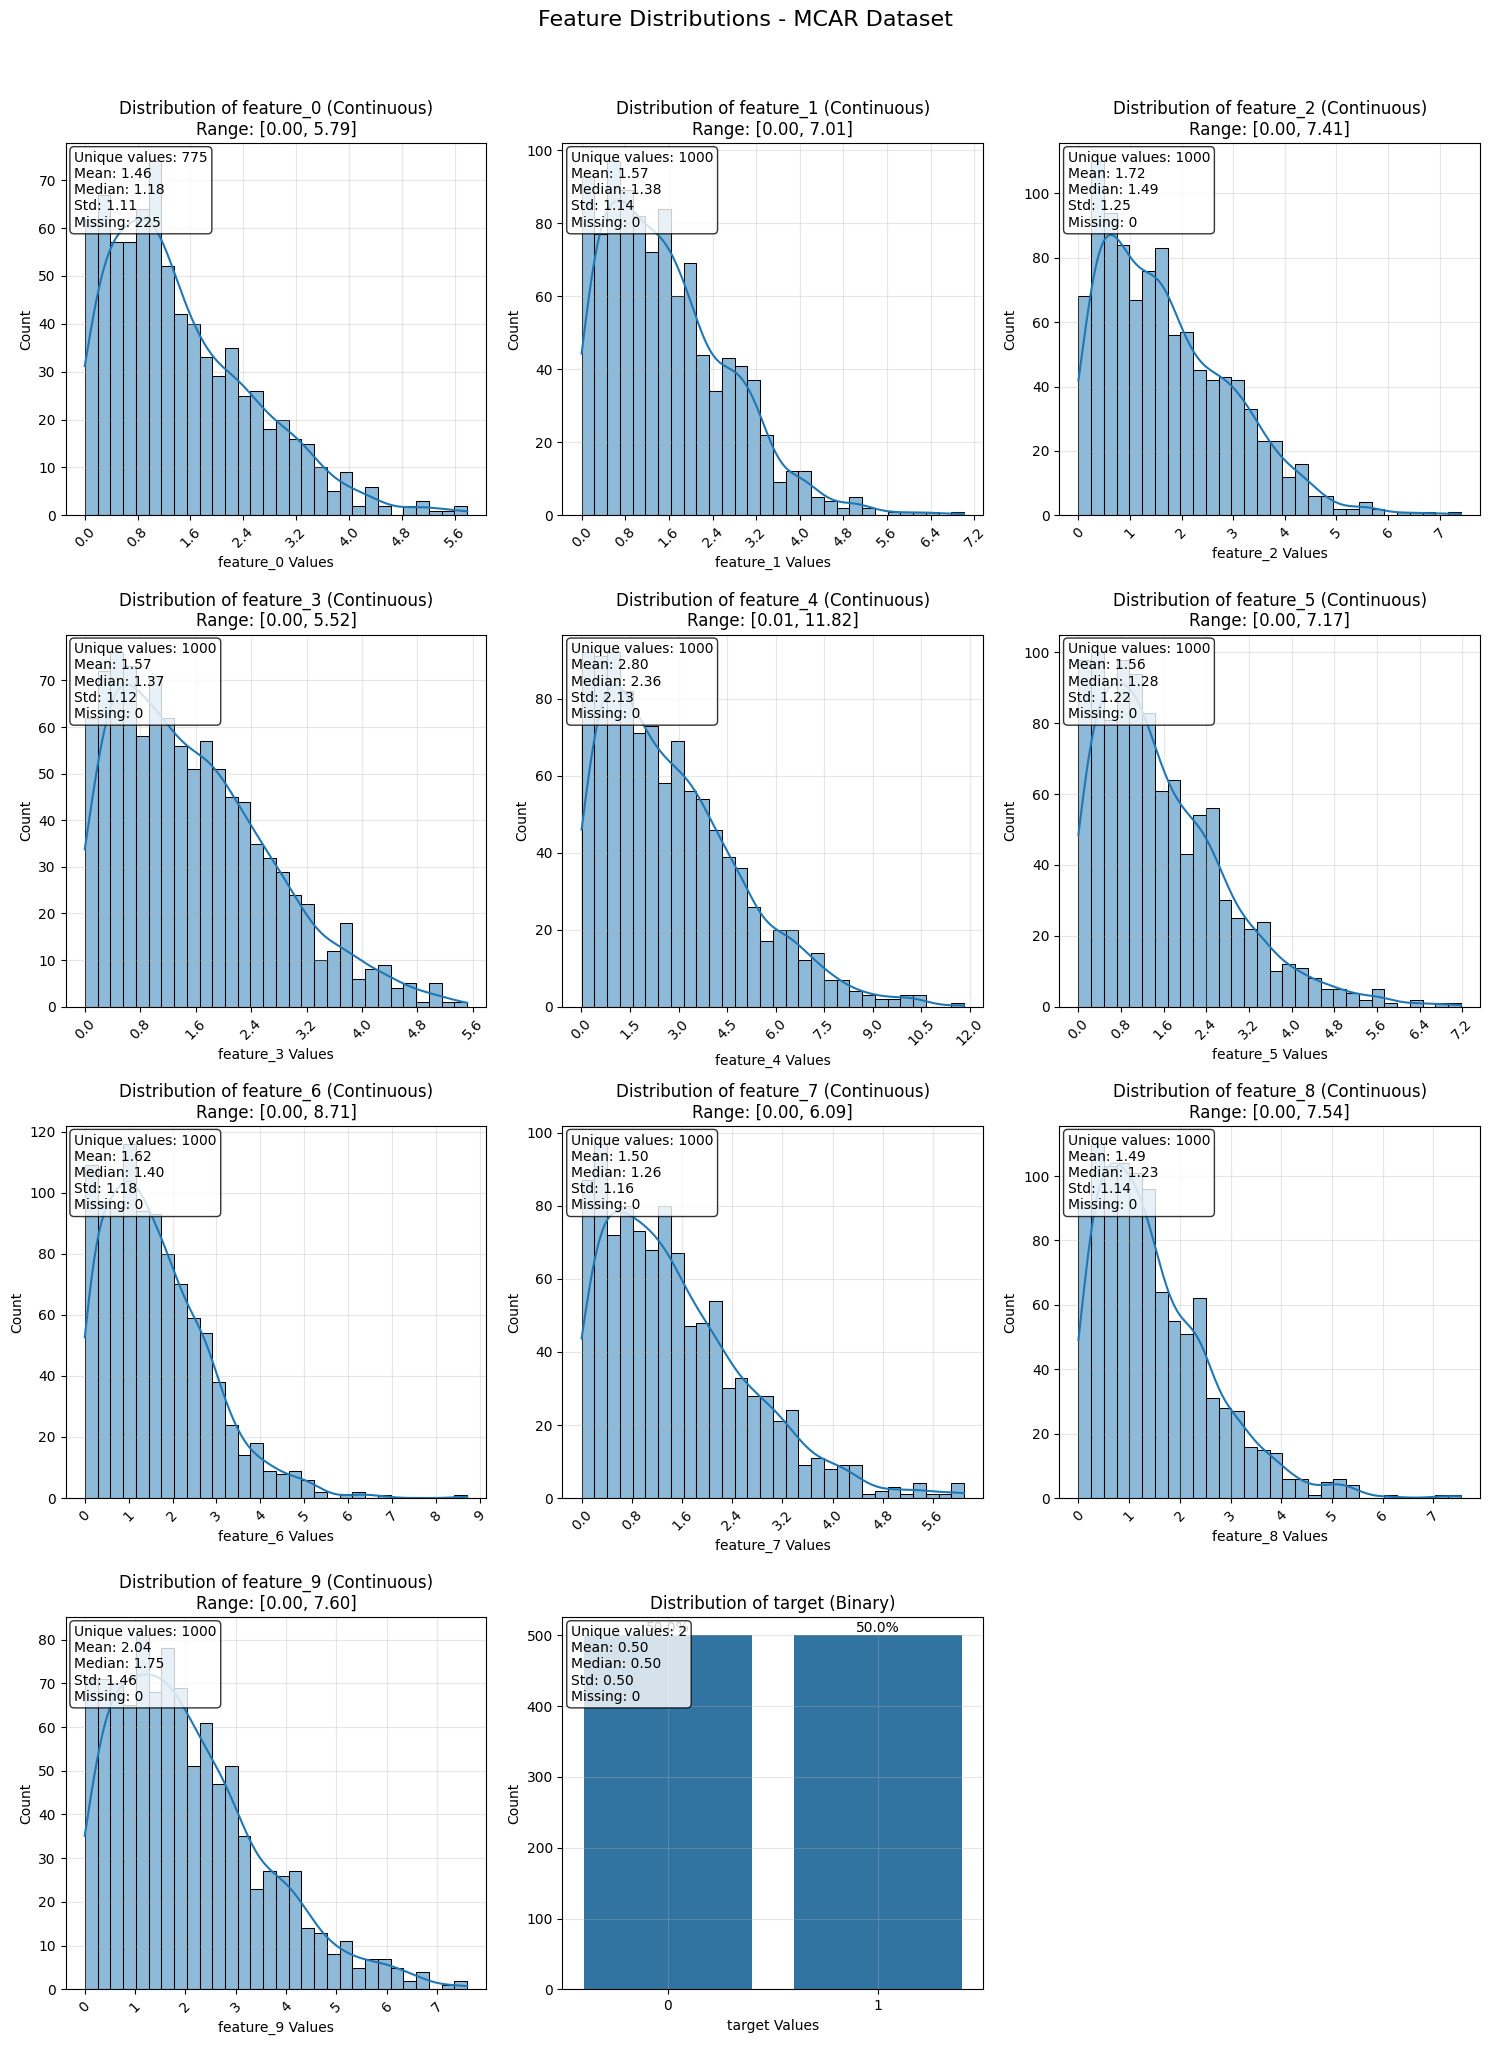

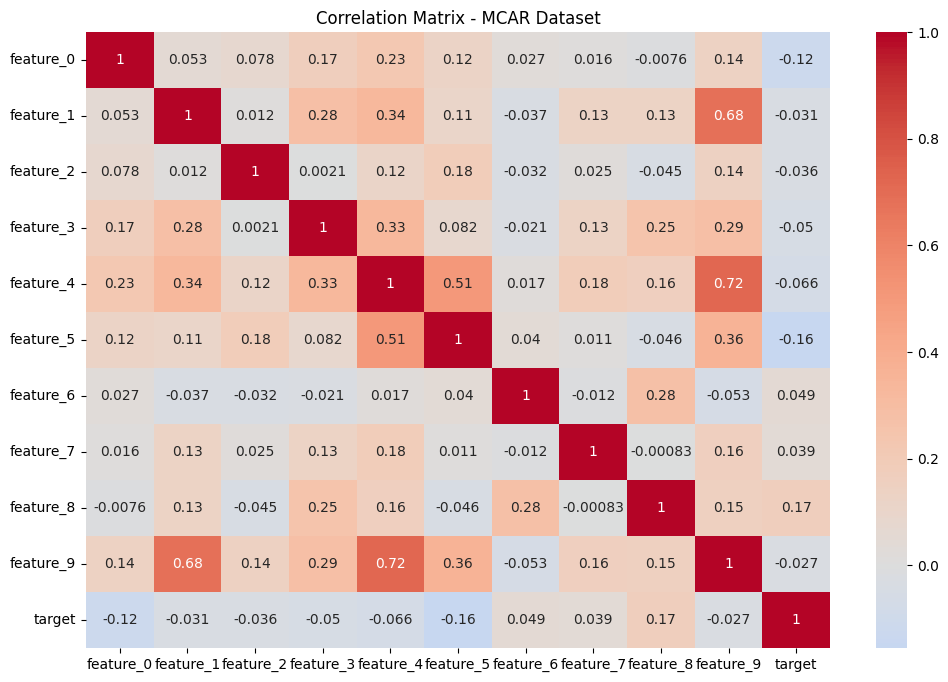

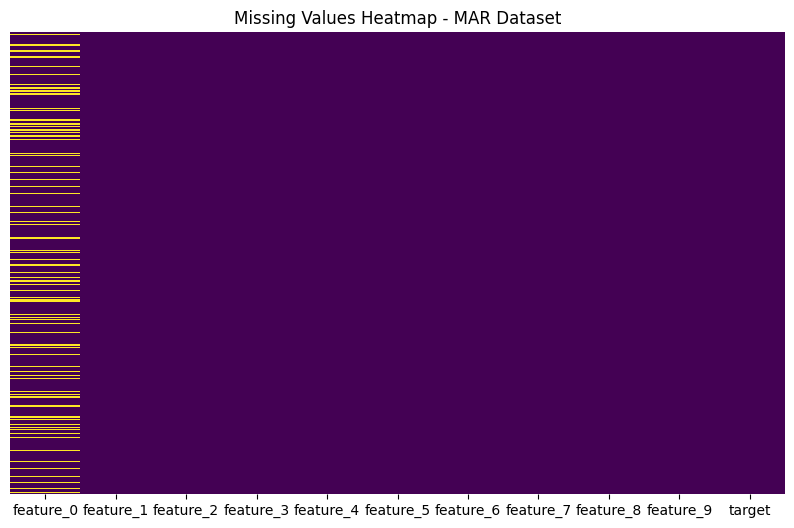

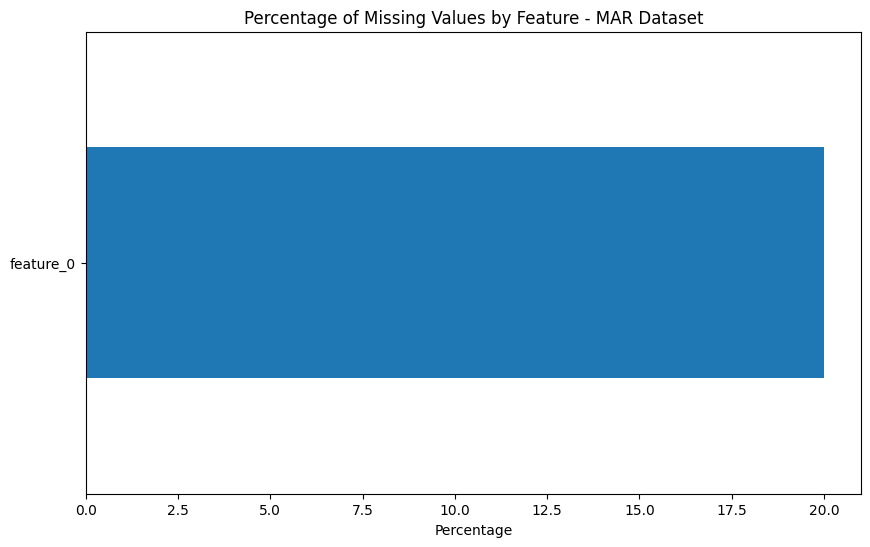

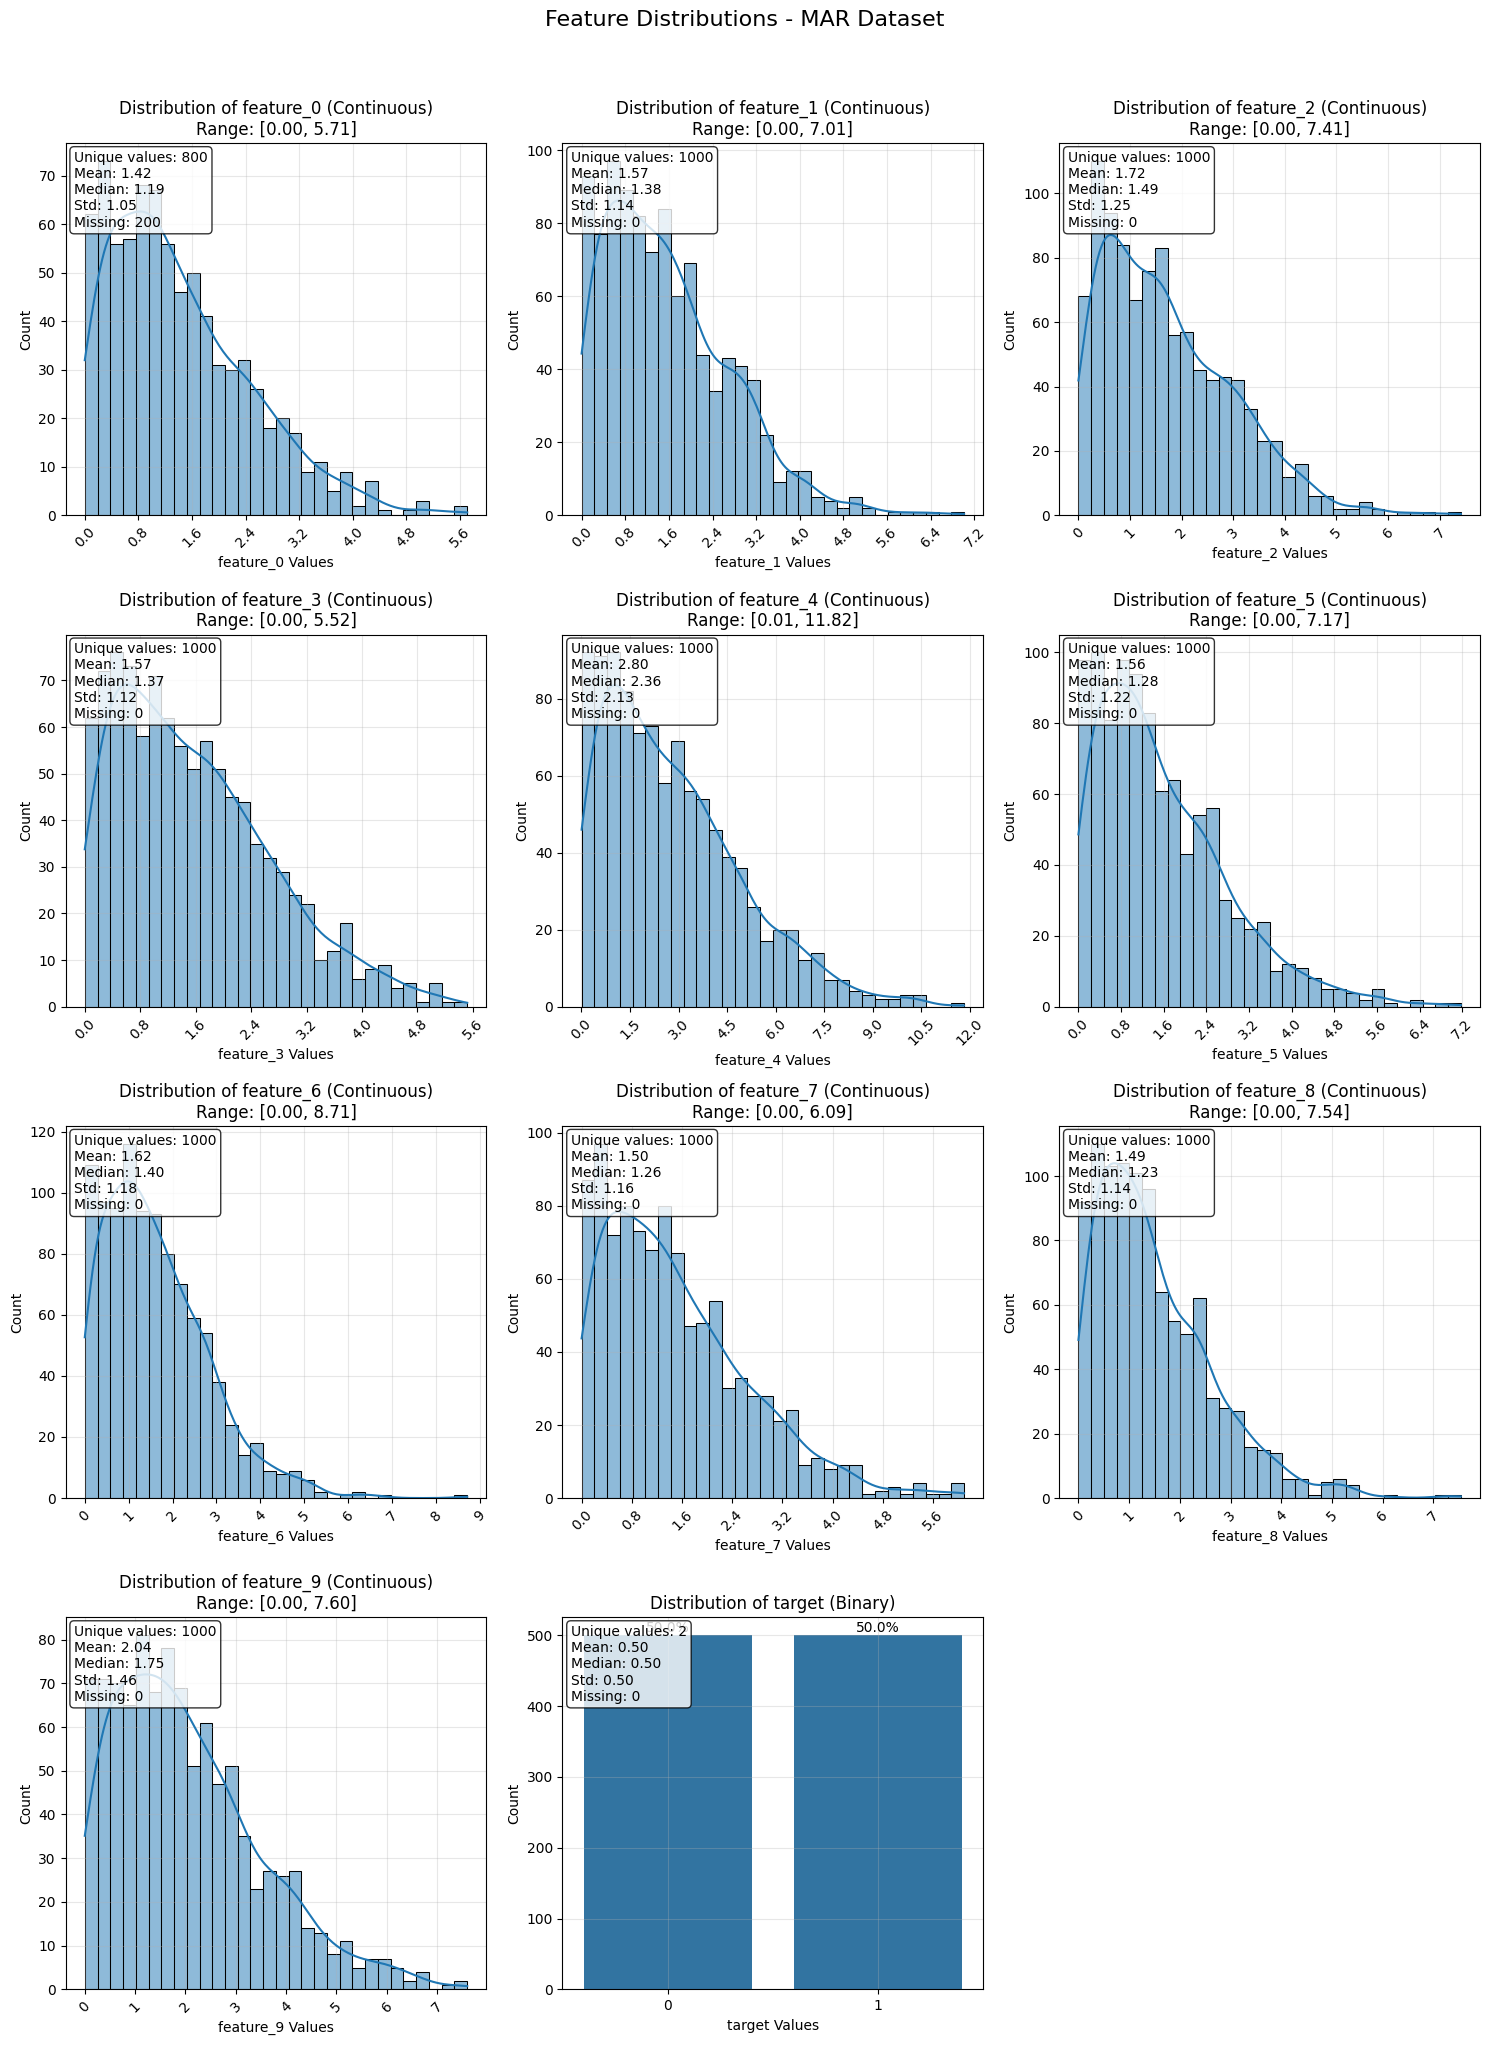

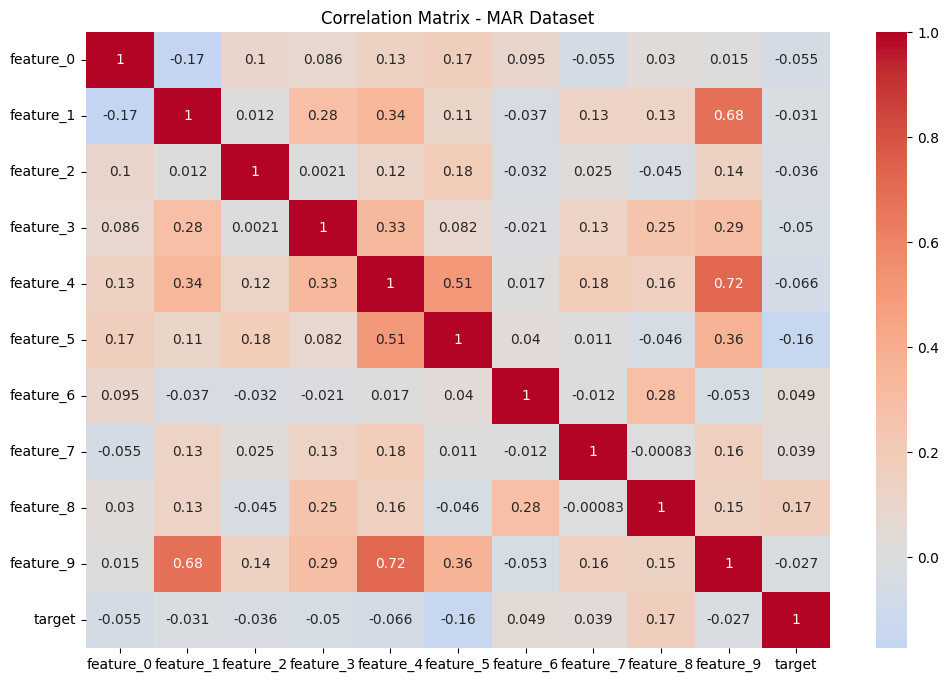

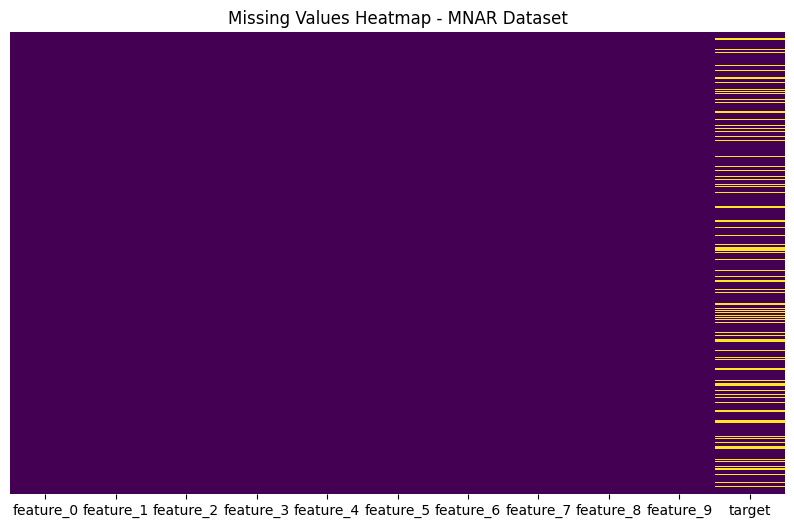

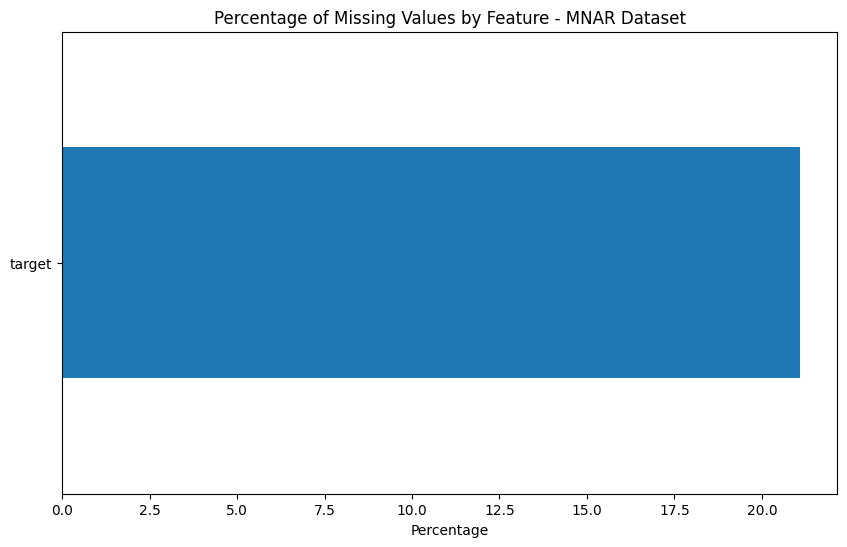

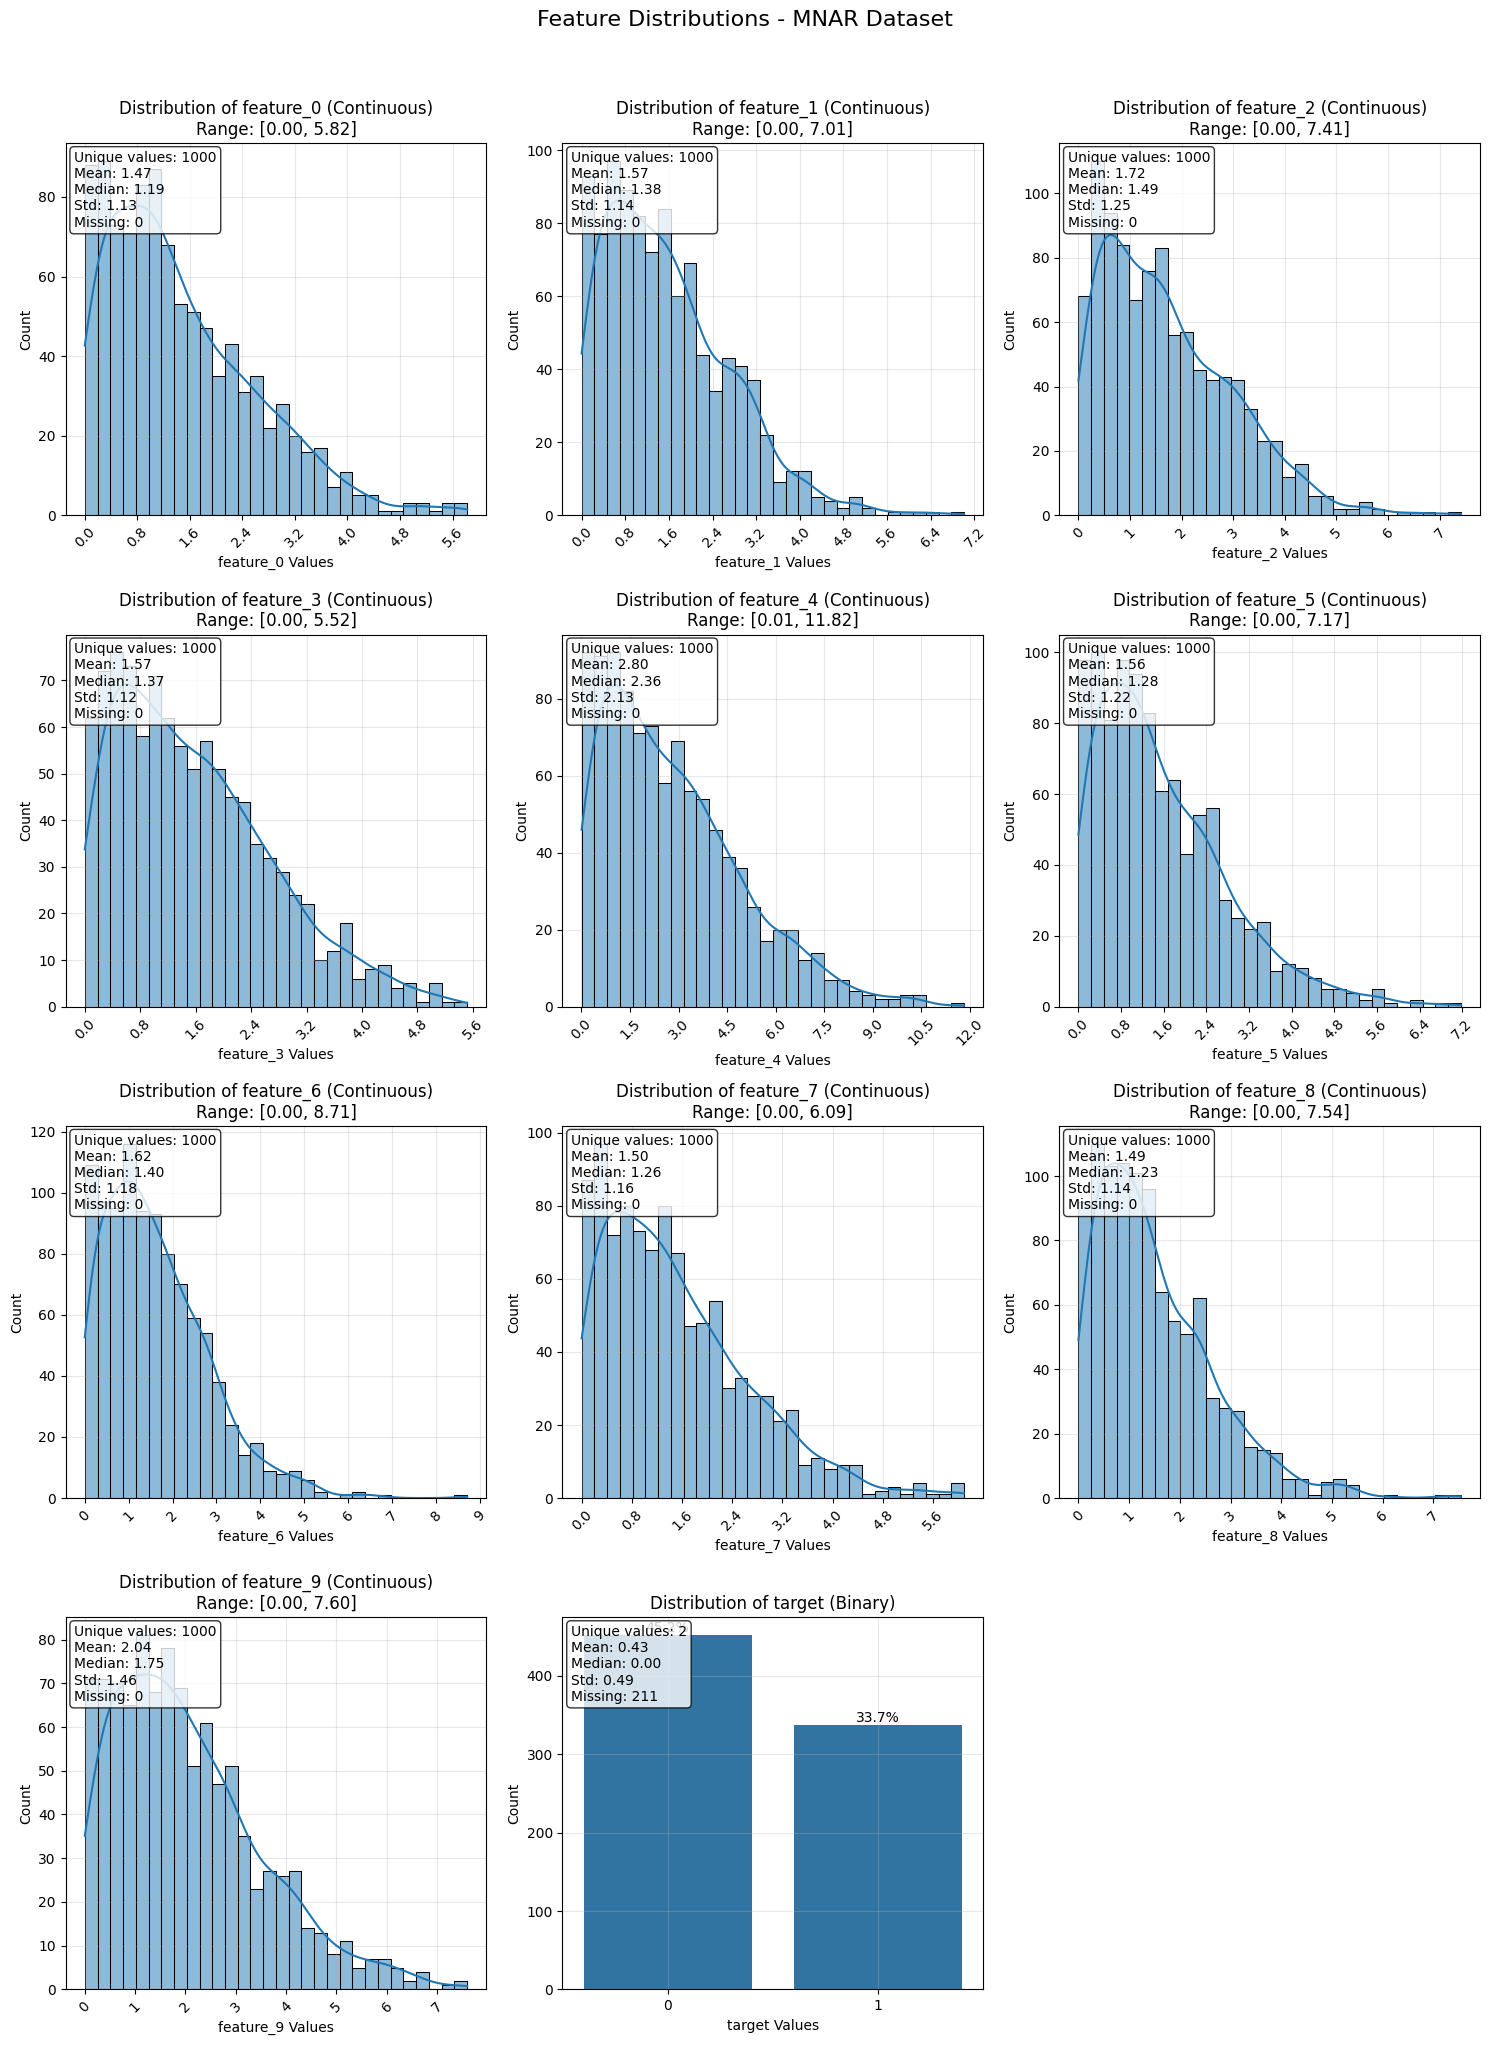

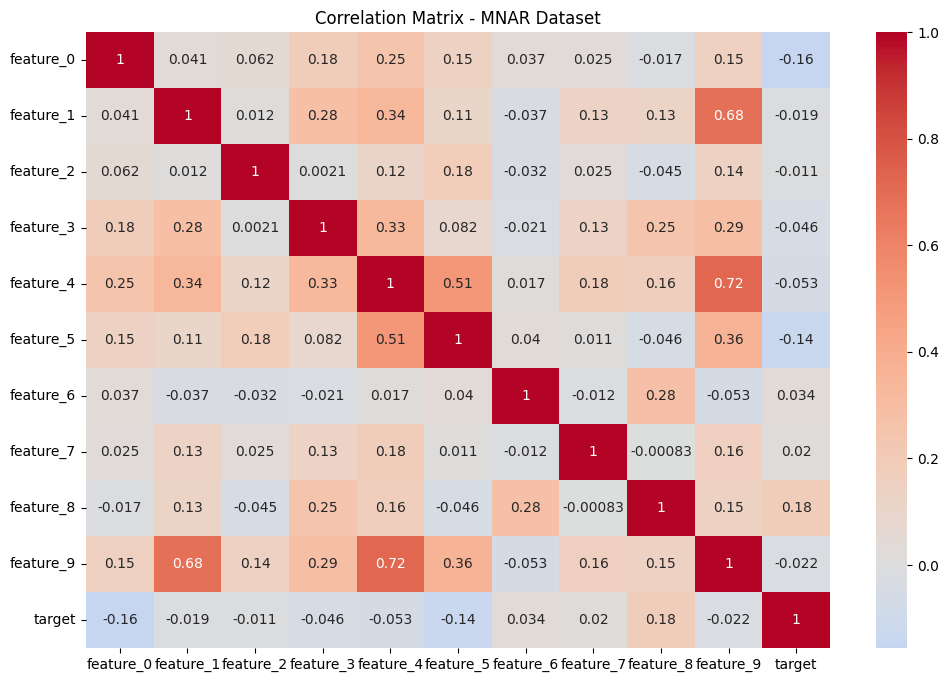

In [6]:
# Visualize missing data patterns
plot_missingness(data_mcar, "MCAR Dataset")

# Plot feature distributions
plot_feature_distributions(data_mcar, "MCAR Dataset")

# Create correlation matrix
create_correlation_matrix(data_mcar, "MCAR Dataset")

# Visualize missing data patterns
plot_missingness(data_mar, "MAR Dataset")

# Plot feature distributions
plot_feature_distributions(data_mar, "MAR Dataset")

# Create correlation matrix
create_correlation_matrix(data_mar, "MAR Dataset")

# Visualize missing data patterns
plot_missingness(data_mnar, "MNAR Dataset")

# Plot feature distributions
plot_feature_distributions(data_mnar, "MNAR Dataset")

# Create correlation matrix
create_correlation_matrix(data_mnar, "MNAR Dataset")

## 4. Handling Missing Data

We'll apply different methods to handle missing data and create multiple versions of our dataset.

### 4.1 Functioned Handling of Missing Data

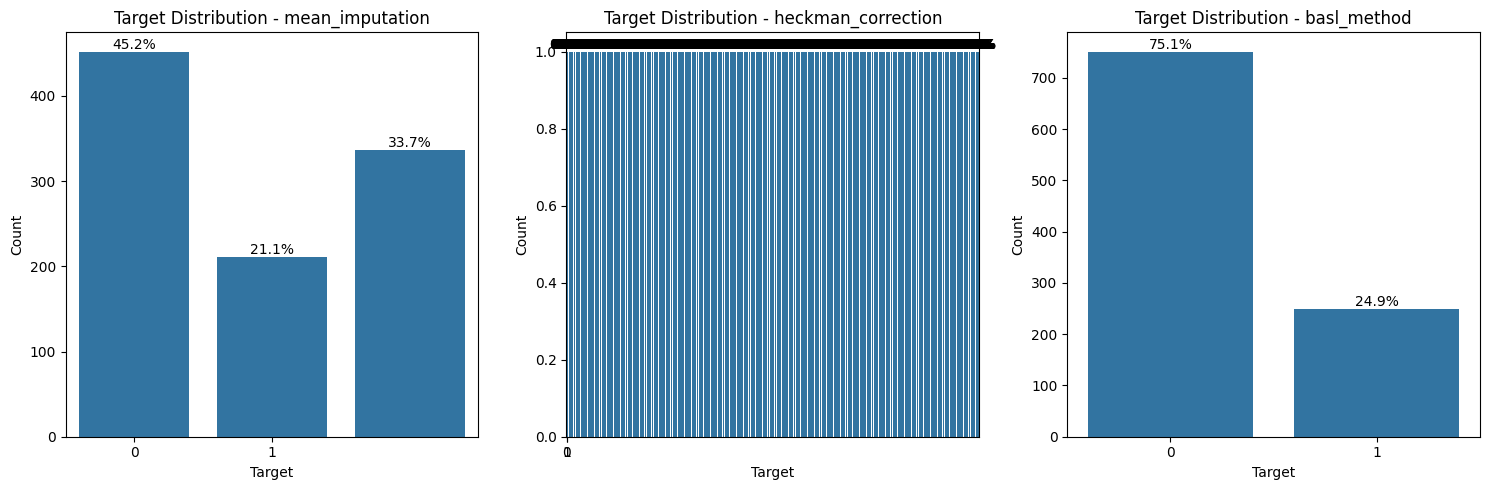


Feature Distributions for mean_imputation:


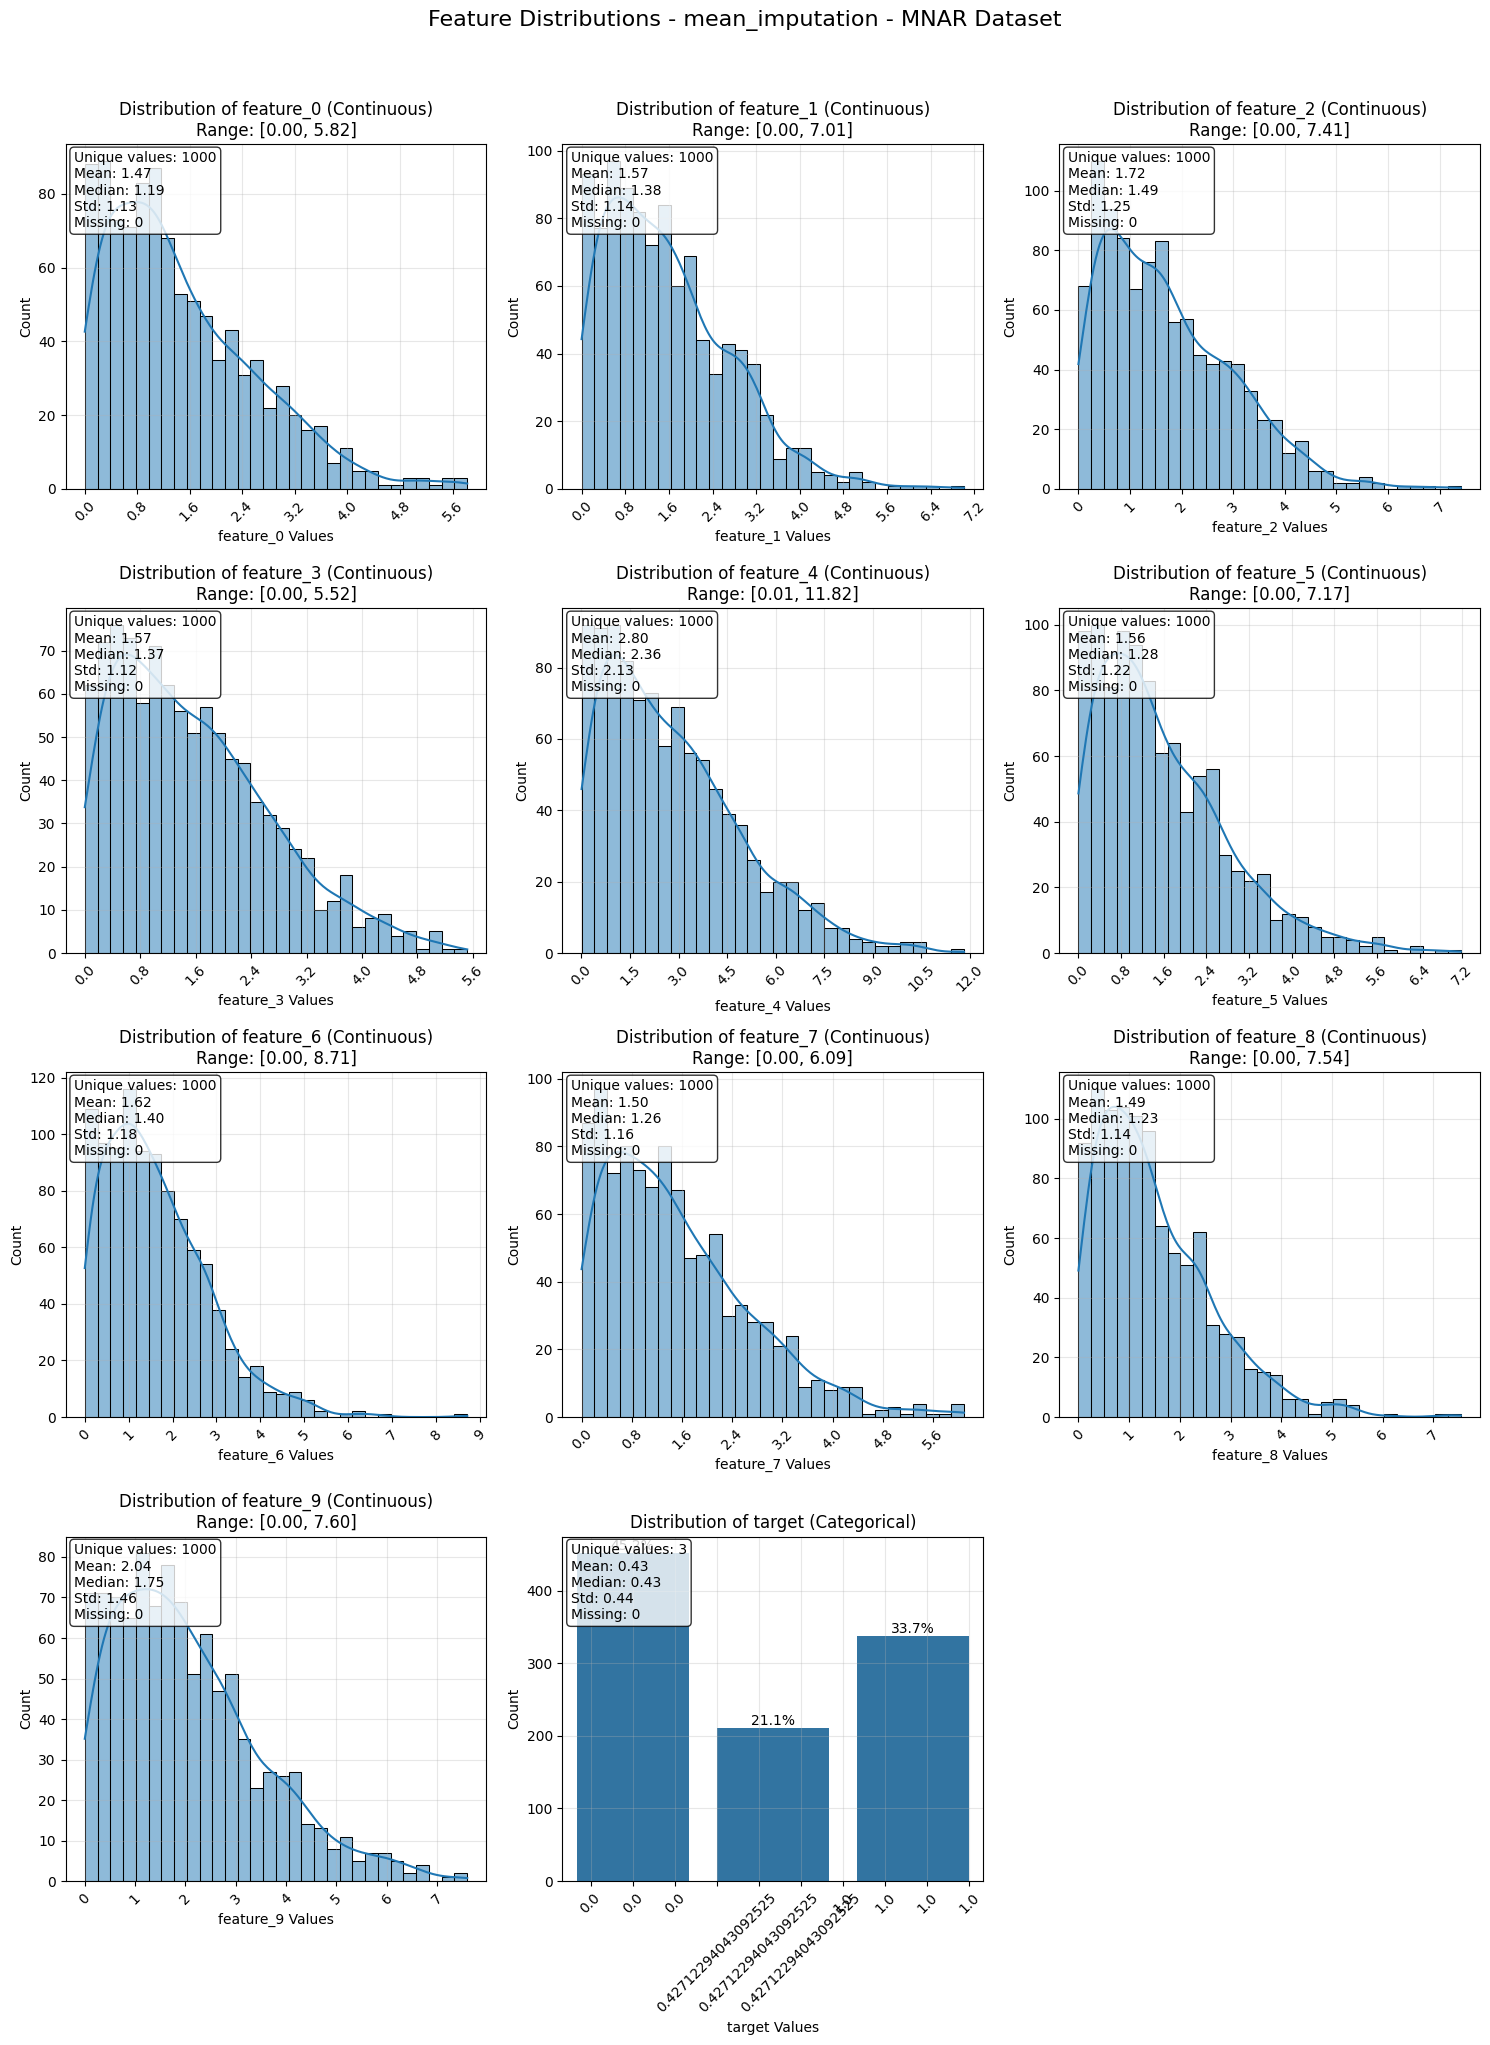


Feature Distributions for heckman_correction:


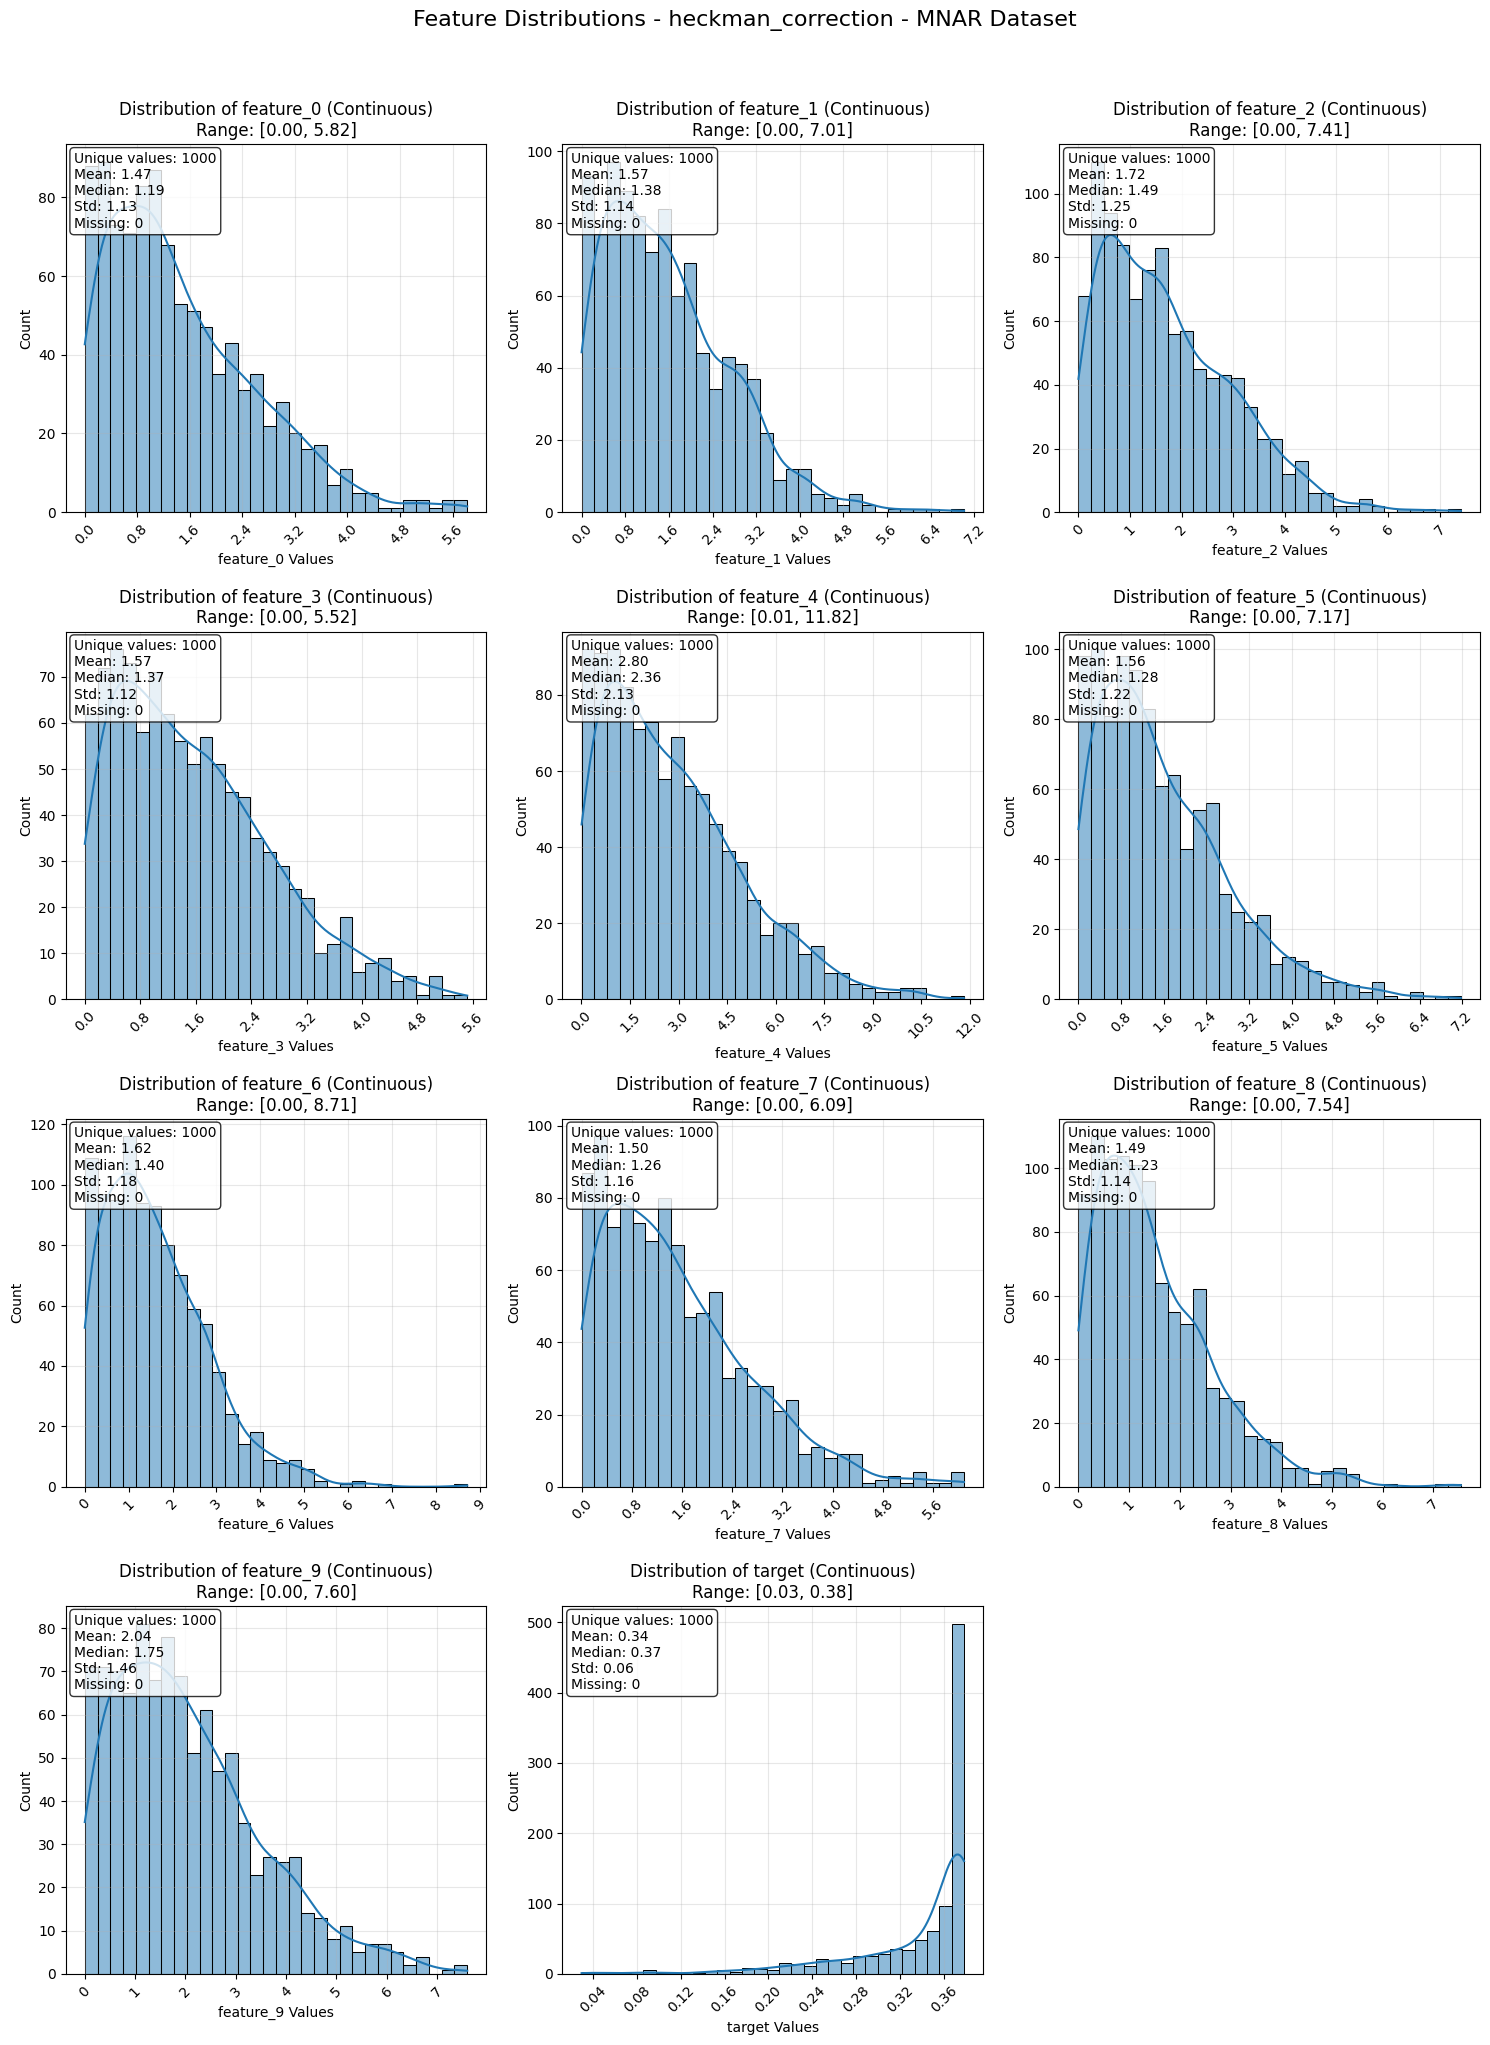


Feature Distributions for basl_method:


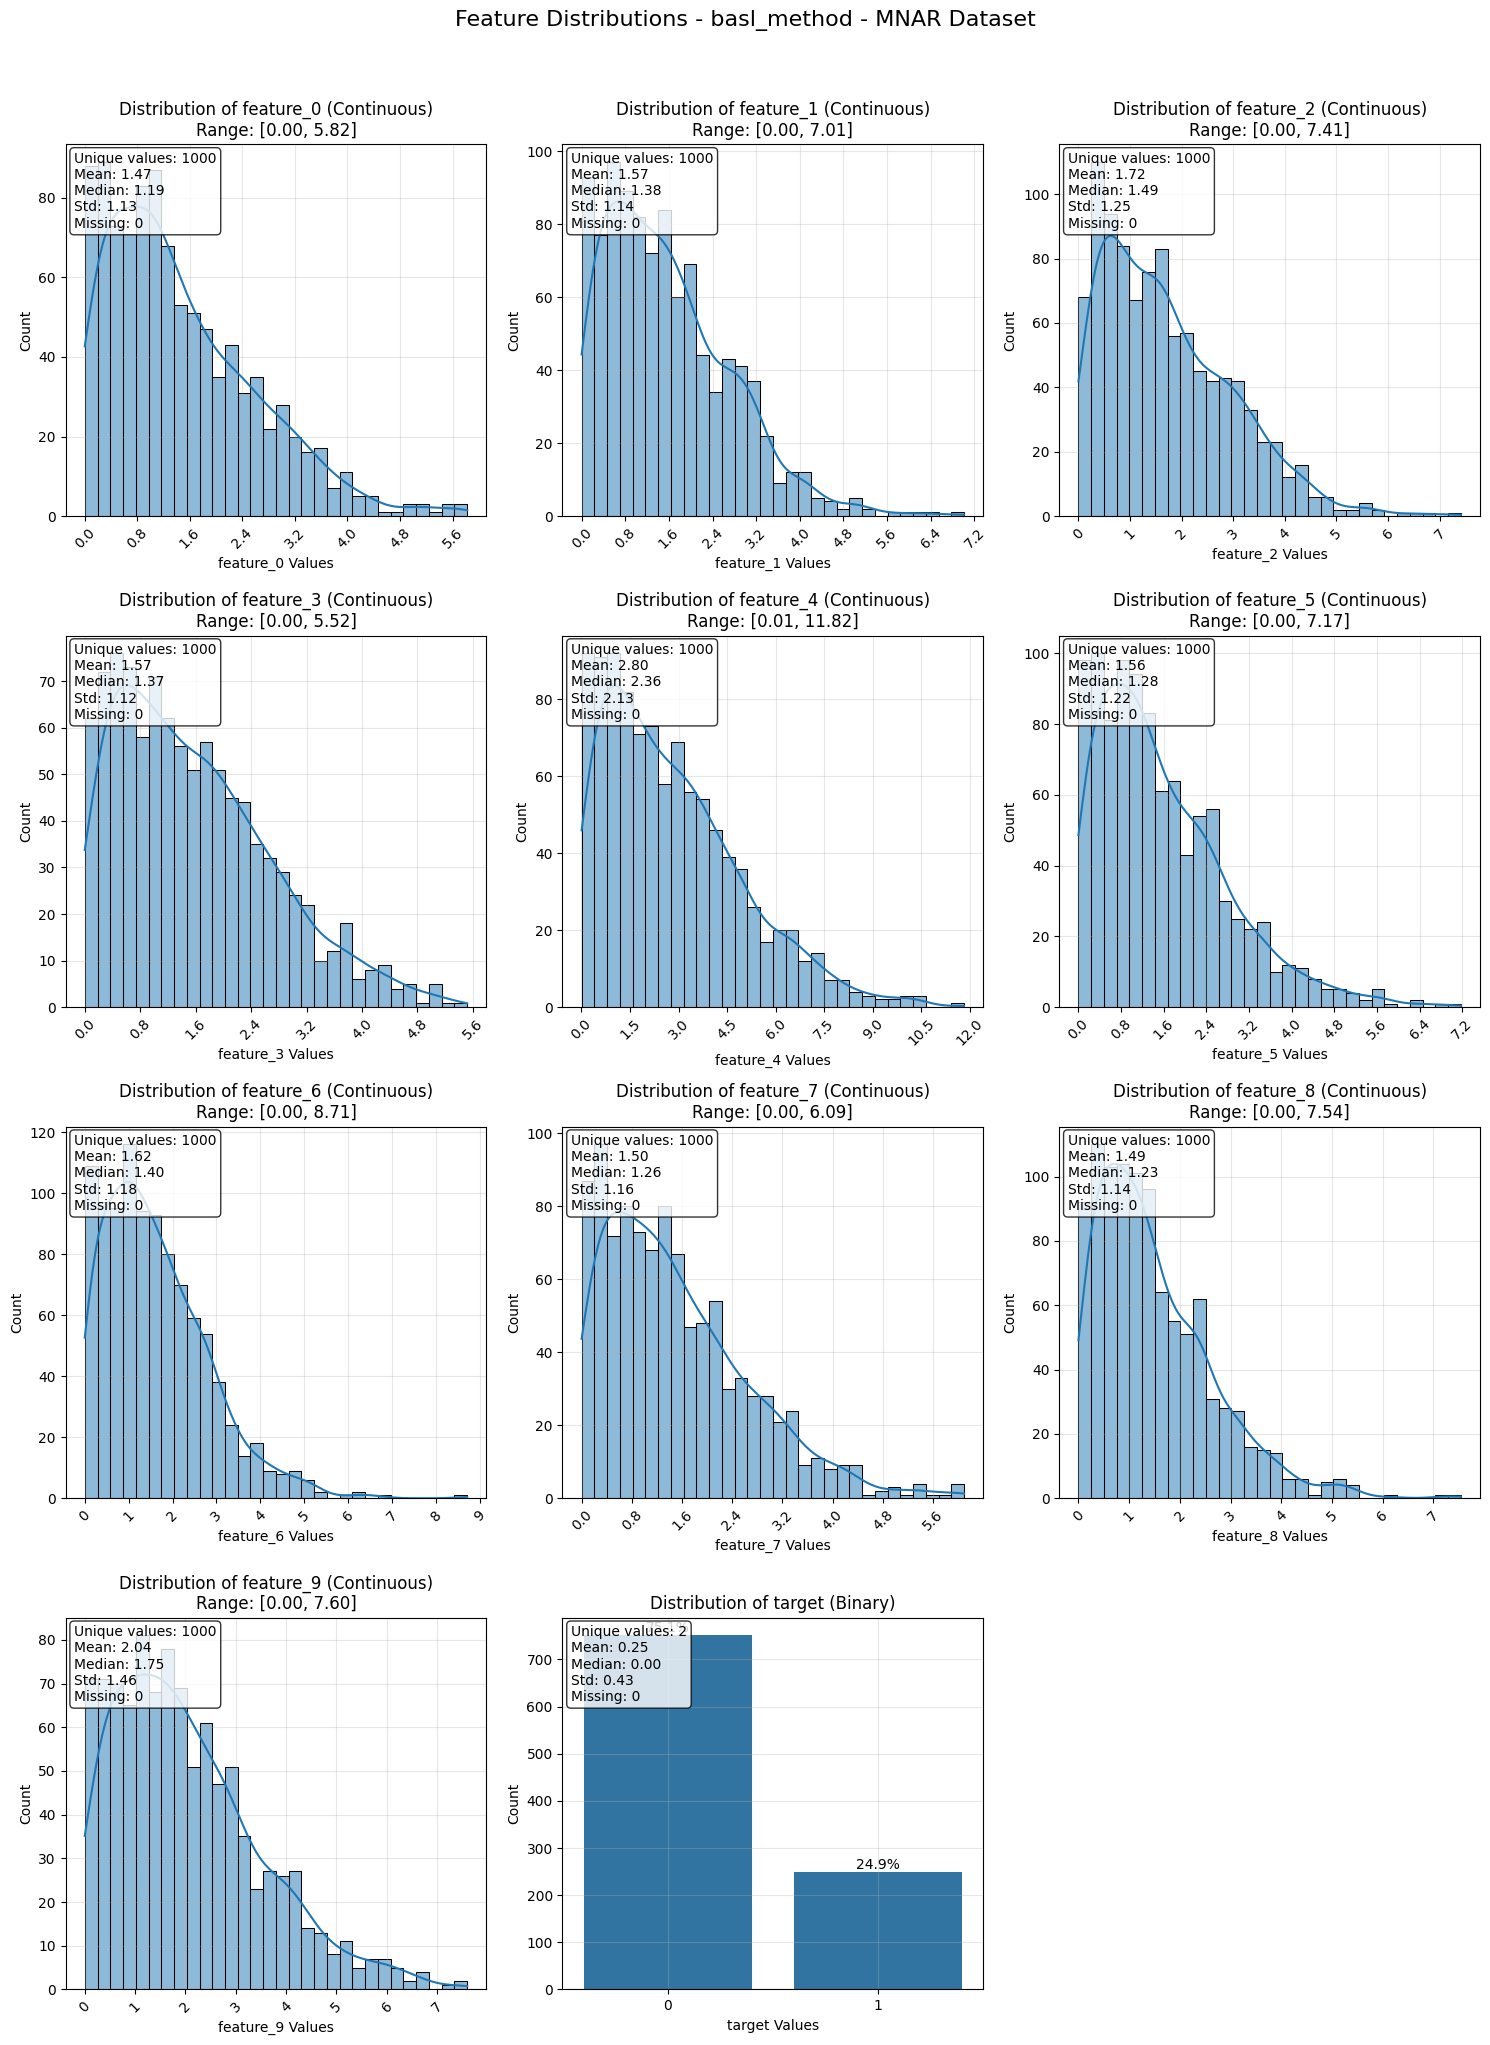


Correlation Matrix for mean_imputation:


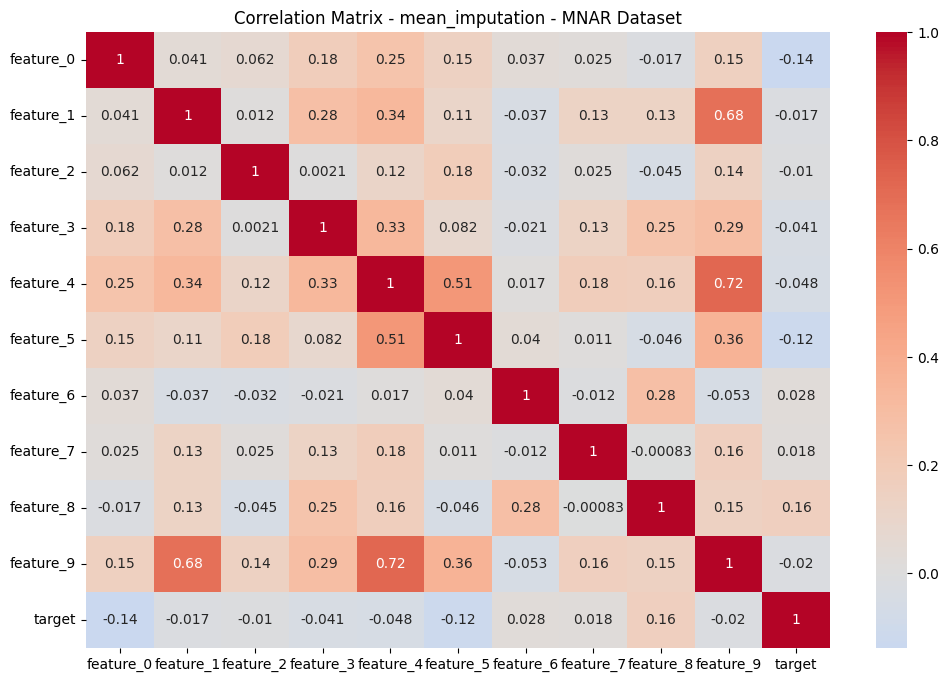


Correlation Matrix for heckman_correction:


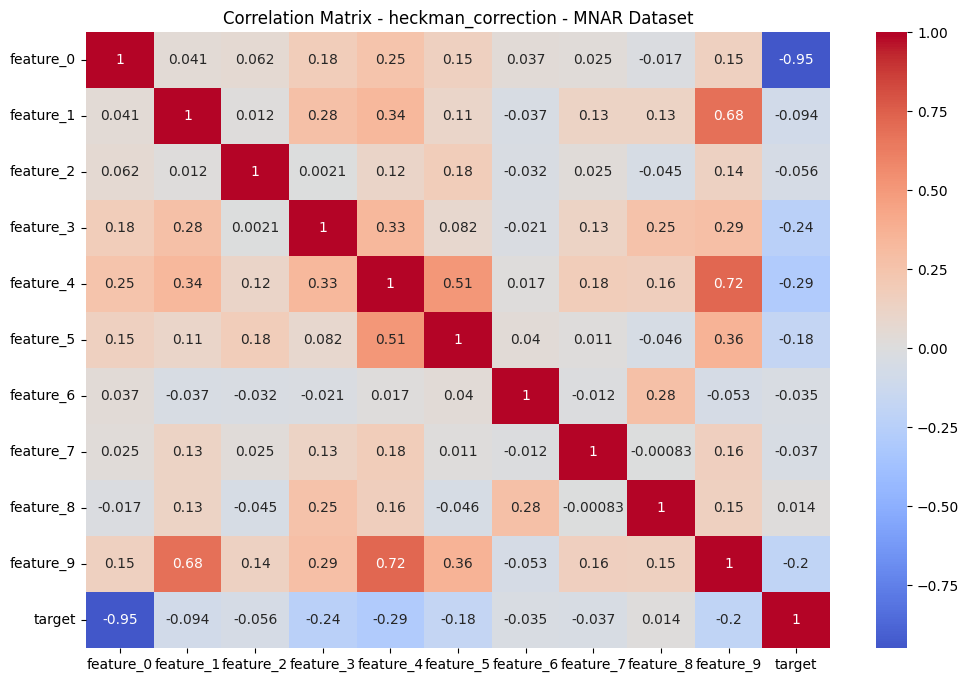


Correlation Matrix for basl_method:


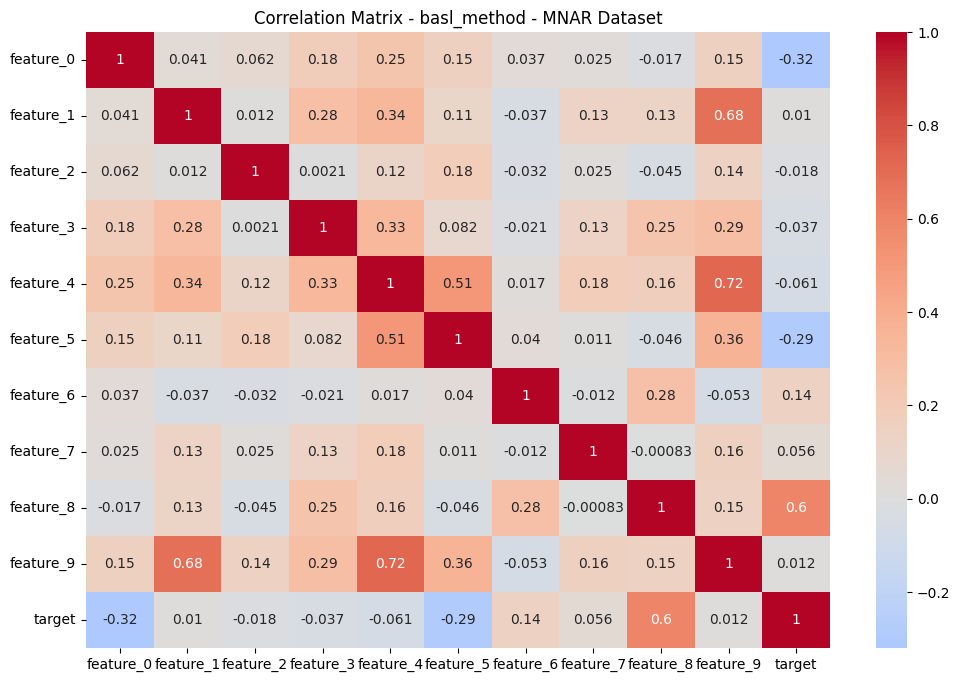


Basic Statistics for mean_imputation:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.468296     1.567074     1.717891     1.572873     2.800319   
std       1.129163     1.143300     1.250512     1.123346     2.133793   
min       0.000896     0.000152     0.003444     0.002226     0.006055   
25%       0.583530     0.648535     0.684025     0.648935     1.098777   
50%       1.190879     1.380120     1.491317     1.369987     2.361372   
75%       2.145394     2.257988     2.555105     2.255166     4.048184   
max       5.824009     7.011590     7.409478     5.517741    11.818684   

         feature_5    feature_6    feature_7    feature_8    feature_9  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.562181     1.621417     1.502517     1.485106     2.040264   
std       1.219414     1.184727     1.155885     1.138858     1.460754  

In [7]:
# Initialize missing data handler
handler = MissingDataHandler()

# Apply different missing data handling methods
df_mean = handler.mean_imputation(data_mnar.copy(), 'target')
df_heckman = handler.heckman_correction(data_mnar.copy(), 'target', 'feature_0')
df_basl = handler.basl_method(data_mnar.copy(), 'target')


# Store datasets in a dictionary
datasets = {
    'mean_imputation': df_mean,
    'heckman_correction': df_heckman,
    'basl_method': df_basl
}

# 1. Compare target distributions
plt.figure(figsize=(15, 5))
for idx, (method, df) in enumerate(datasets.items(), 1):
    plt.subplot(1, 3, idx)
    sns.countplot(data=df, x='target')
    plt.title(f'Target Distribution - {method}')
    plt.xlabel('Target')
    plt.ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for p in plt.gca().patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                          ha='center', va='bottom')
    
    # Force x-axis to show only 0 and 1
    plt.gca().set_xticks([0, 1])
    plt.gca().set_xticklabels(['0', '1'])
plt.tight_layout()
plt.show()

# 2. Compare feature distributions for each method
for method, df in datasets.items():
    print(f"\nFeature Distributions for {method}:")
    plot_feature_distributions(df, f"{method} - MNAR Dataset")

# 3. Compare correlation matrices
for method, df in datasets.items():
    print(f"\nCorrelation Matrix for {method}:")
    create_correlation_matrix(df, f"{method} - MNAR Dataset")

# 4. Print basic statistics for each method
for method, df in datasets.items():
    print(f"\nBasic Statistics for {method}:")
    print(df.describe())

# 5. Compare missing values
for method, df in datasets.items():
    print(f"\nMissing Values for {method}:")
    print(df.isnull().sum())

### 4.2 Testing Experimental Imputation Methods

In [14]:
# Median Imputation
median_imputer = SimpleImputer(strategy='median')
data_mnar_median_imputed_nd = median_imputer.fit_transform(data_mnar)

# Convert back to DataFrame with original column names
data_mnar_median_imputed = pd.DataFrame(data_mnar_median_imputed_nd, columns=data_mnar.columns)
data_mnar_median_imputed.to_csv("data_mnar_median_imputed.csv", index=False)

In [22]:
# Separate features and target
features = data_mnar.drop(columns=['target'])  # Keep continuous features unchanged
target = data_mnar[['target']]  # Ensure target is a DataFrame (not a Series)

# Apply MICE only on the target variable
imputer = IterativeImputer(estimator=LogisticRegression(), random_state=42)
target_imputed_nd = imputer.fit_transform(target)  # Apply only on target

# Convert back to DataFrame and round to ensure binary values
target_imputed = pd.DataFrame(target_imputed_nd, columns=['target'])
target_imputed['target'] = np.round(target_imputed['target']).astype(int)  # Force binary

# Merge imputed target with original features
data_mnar_mice_imputed = pd.concat([features, target_imputed], axis=1)

# Save the final dataset
data_mnar_mice_imputed.to_csv("data_mnar_mice_imputed.csv", index=False)

# Verify imputation
print("Imputation completed. Target variable distribution after MICE:")
print(data_mnar_mice_imputed['target'].value_counts())

Imputation completed. Target variable distribution after MICE:
target
0    663
1    337
Name: count, dtype: int64


## 5. Model Training

Now we'll train models using each version of our dataset.

In [8]:
# Initialize model and evaluator
model = CreditScoringModel()
evaluator = ModelEvaluator()

# Dictionary to store results
results = {}

# Train and evaluate models for each dataset
for method_name, dataset in datasets.items():
    print(f"\nProcessing {method_name}...")
    
    # Prepare data using the model's prepare_data method
    X_train, X_test, y_train, y_test = model.prepare_data(dataset, target='target')
    
    # Debug prints
    print(f"\nDataset: {method_name}")
    print(f"Target unique values: {y_train.unique()}")
    print(f"Target dtype: {y_train.dtype}")
    
    # Train model
    model.train(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
    
    # Evaluate
    results[method_name] = evaluator.evaluate_model(y_test, y_pred, y_pred_proba)
    
    # Print results
    print(f"\nResults for {method_name}:")
    print(results[method_name])


Processing mean_imputation...

Dataset: mean_imputation
Target unique values: [0.42712294 1.         0.        ]
Target dtype: float64


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## 6. Model Evaluation

Let's evaluate the performance of each model.

In [ ]:
# Compare model performances
evaluator.compare_models(results)

# Print detailed results
for method_name, metrics in results.items():
    print(f"\nResults for {method_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

## 7. Results Comparison

Let's analyze the differences between the methods.

In [ ]:
# Create comparison visualizations
metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
evaluator.compare_models(results, metrics=metrics_to_compare)

## 8. Conclusions

Based on our analysis:

1. **Method Comparison**:
   - [Fill in observations about which method performed best]
   - [Note any interesting patterns in the results]

2. **Practical Implications**:
   - [Discuss what these results mean for credit scoring]
   - [Note any limitations or areas for future research]

3. **Recommendations**:
   - [Provide specific recommendations based on the results]
   - [Suggest best practices for handling missing data in credit scoring]